%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/isabelangelo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['single']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(array([0.00000000e+00, 0.00000000e+00, 9.32017544e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.86403509e-04, 1.86403509e-04,
        3.72807018e-04, 3.72807018e-04, 1.86403509e-04, 4.66008772e-04,
        1.11842105e-03, 1.39802632e-03, 6.52412281e-04, 9.32017544e-04,
        3.72807018e-04, 2.79605263e-04, 9.32017544e-05, 9.32017544e-05,
        9.32017544e-05, 0.00000000e+00, 9.32017544e-05, 0.00000000e+00,
        9.32017544e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 200.        ,  341.17647059,  482.35294118,  623.52941176,
         764.70588235,  905.88235294, 1047.05882353, 1188.23529412,
        1329.41176471, 1470.58823529, 1611.76470588, 1752.94117647,
        1894.11764706, 2035.29411765, 2176.47058824, 2317.64705882,
        2458.82352941, 2600.        , 2741.17647059, 2882.35294118,
        3023.52941176, 3164.70588235, 3305

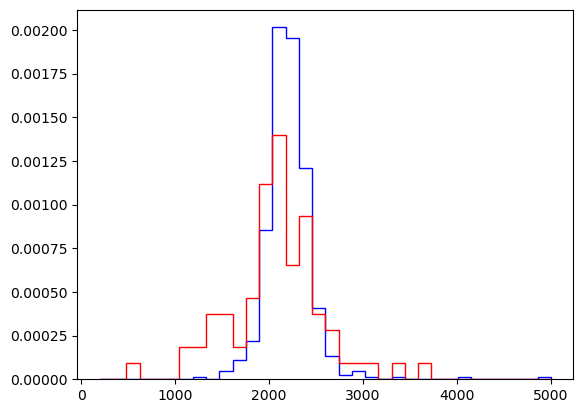

In [49]:
# now it's time to look at the oddball metrics...
import pandas as pd
import numpy as np
%pylab inline
single = pd.read_csv('./data/binary_metric_dataframes/single_metrics.csv')
spocs_labels = pd.read_csv('./data/label_dataframes/spocs_labels.csv')
spocs = pd.read_csv('./data/binary_metric_dataframes/spocs_metrics.csv')

spocs_flux = pd.read_csv('./data/gaia_rvs_dataframes/spocs_flux.csv')
spocs_sigma = pd.read_csv('./data/gaia_rvs_dataframes/spocs_sigma.csv')

single_chisq_bins = np.linspace(200,5000,35)
hist(single.single_fit_chisq, bins = single_chisq_bins, histtype='step', color='b',
    density=True)
hist(spocs.single_fit_chisq, bins = single_chisq_bins, histtype='step', color='r',
    density=True)

In [50]:
# chisq = (data - model)**2/(errors**2 + sigma**2)
# when the model works well, 
# the model should never work better than 1%, since it has an SNR of 100

# SNR=100:
# (data - model) should be 1%, errors are 1% and sigma**2=0, so chi2 = 2300
# SNR = 50:
# (data - model) is 2%, errors are 2% and sigma**2=0 so chi2 = 2300
# SNR = 300
# (data - model) is still 1%, errors are 0.3% and sigma**2=0 so chi2>2300, which is wrong.

In [51]:
# let me plot average (data - model)**2
# as a function of SNR to see if this is all as expected.
import gaia_spectrum
snr = [];model_sigma = [];single_fit_chisq = []
for source_id in spocs_labels.source_id.to_numpy():
    flux = spocs_flux[str(source_id)]
    sigma = spocs_sigma[str(source_id)]
    spec = gaia_spectrum.GaiaSpectrum(source_id,flux,sigma)
    model_sigma.append(np.mean(abs(flux - spec.single_fit)))
    snr.append(spec.rvs_snr)
    single_fit_chisq.append(spec.single_fit_chisq)
    print(source_id)

2343647384368388608
5031808453624044800
2477891500647336704
8479094371605632
5181087291900789888
231113736385994624
3208926854625048064
2898239468873596800
2899947933845777920
3113909602378333056
3101382419728401408
3057712223051571200
582221750852254080
746545172372256384
3532823773073745536
3575733210781078016
3712538811193759744
3641697998570813952
1606148310770764288
6224299285781594624
4345775217221821312
1333760419707327744
4367026303085396352
4093301474693288960
2041085973668754176
4315804351350378496
2029433521248546304
1833199729671740800
6463782435948431616
2119828460957942528
2117369540643692544
2119736892255743744
2119655803272920448
2106822131756841600
2131620306552653312
2106390642162257536
2106497157350919296
2132082999087248384
2131133261560058496
2131060521993182976
2101479879638683392
2101041513795585024
2127832695152371584
2129724237409548288
2128409045404259328
2077773790469159680
2052184512764630272
2128094451941001856
2080505900764913792
2079576611581927168
207608

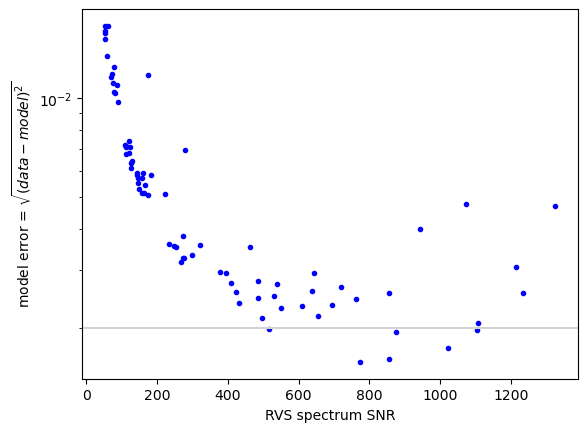

In [52]:
plot(snr, model_sigma, 'b.')
xlabel('RVS spectrum SNR')
ylabel(r'model error = $\sqrt{(data - model)^2}$')
axhline(0.002, color='lightgrey')
yscale('log')

Text(0.001, 0.07, 'model uncertainty limited')

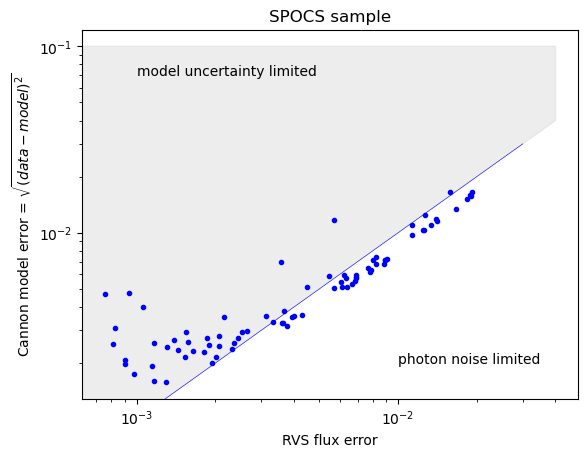

In [53]:
signal_sigma = [1/i for i in snr]
plot(signal_sigma, model_sigma, 'b.')
xlabel('RVS flux error')
ylabel(r'Cannon model error = $\sqrt{(data - model)^2}$')
# I'm interested in the models where the error is model-limited
# so these would be above the one-to-one line
plot([0,0.03],[0,0.03], 'b-', lw=0.4)
fill_between([0,0.04],[0,0.04], y2=0.1, alpha=0.4, color='lightgrey')
xscale('log');yscale('log');title('SPOCS sample')

# let me now try to interpret these regions
# below the line, flux error is greater than the model uncertainty,
# these should have normal chi2
text(1e-2, 2e-3,'photon noise limited')
text(1e-3,7e-2,'model uncertainty limited')

# above the line the model error dominates


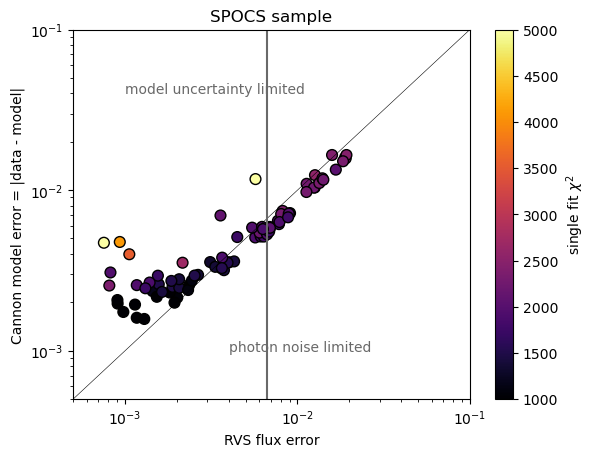

In [54]:
# what is the chi2 for these points?

signal_sigma = [1/i for i in snr]
scatter(signal_sigma, model_sigma, c=single_fit_chisq, cmap='inferno',
        edgecolor='k', vmin=1000,vmax=5000, s=60)
xlabel('RVS flux error')
ylabel(r'Cannon model error = |data - model|')
plot([0,0.1],[0,0.1], 'k-', lw=0.4)
#fill_between([0,0.04],[0,0.04], y2=0.1, alpha=0.4, color='lightgrey')
xscale('log');yscale('log');title('SPOCS sample')
colorbar(label=r'single fit $\chi^2$')
text(4e-3, 1e-3,'photon noise limited', color='dimgrey')
text(1e-3,4e-2,'model uncertainty limited', color='dimgrey')
xlim(5e-4,0.1);ylim(5e-4,0.1)
axvline(1/150, color='dimgrey') # training set uncertainty

In [55]:
# this will compute these statistics for very high SNR targets
import glob
from astropy.io.votable import parse_single_table
import gaia_spectrum
import numpy as np

high_snr_filenames = glob.glob('../high_snr_rvs_spectra/*.xml')
bright_snr = [];bright_model_sigma = [];bright_single_fit_chisq = []
single_fit = []
for filename in high_snr_filenames:
    source_id = filename.split(' ')[2][:-4]
    print(source_id, end=', ')
    data = parse_single_table(filename).array
    flux = data['flux'].data[20:-20]
    sigma = data['flux_error'].data[20:-20]
    # remove nans from flux, sigma
    finite_idx = ~np.isnan(flux)
    if np.sum(finite_idx) != len(flux):
        w_interp_to = gaia_spectrum.custom_model.w
        flux = np.interp(w_interp_to, w_interp_to[finite_idx], flux[finite_idx])
    sigma = np.nan_to_num(sigma, nan=1)
    
    try:
        spec = gaia_spectrum.GaiaSpectrum(source_id, flux, sigma)
        spec.compute_oddball_metrics()
        if np.log10(spec.single_fit_training_density) > -6:
            bright_model_sigma.append(np.mean(abs(flux - spec.single_fit)))
            bright_snr.append(spec.rvs_snr)
            bright_single_fit_chisq.append(spec.single_fit_chisq)
            single_fit.append(abs(spec.single_fit - flux))
            print(np.log10(spec.single_fit_training_density))
        else:
            print(np.log10(spec.single_fit_training_density), 'density too low')
            pass
    except:
        print('didnt work for whatever reason')
        pass

4345775217221821312, -3.0632016168844336
2899947933845777920, -2.6193367491590873
1333760419707327744, -3.4660239334804834
1787990525934491776, -4.798215360426907
1143461757535195392, -6.999998449730043 density too low
5528866839863569024, -3.126339495298789
4176501313320676992, -2.878927006304329
5952444383044606336, -3.653320388068036
1805044913356835328, -2.71365951840416
1606148310770764288, -3.700878174446112
4827523900468374272, -3.4597831810778117
6466670337598422912, -2.884664318441352
1896396703077703936, -3.3101817087508243
2072596018435832960, -3.4387160125813514
1999127682240390528, -3.9997671765104554
4354950641755249024, -3.7838241443870615
6384510877400590336, -2.897981420338296
3400292798990117888, -2.859368053888594
4973139402225747072, -2.344966759739811
4418203587193988480, -2.9589716107933715
5866992641380992256, -4.573223306058236
4922906809055232640, -2.902149782839457
6417553057243290112, -2.457301108454646
3309493720019304576, -2.5910636433377516
202943352124854

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


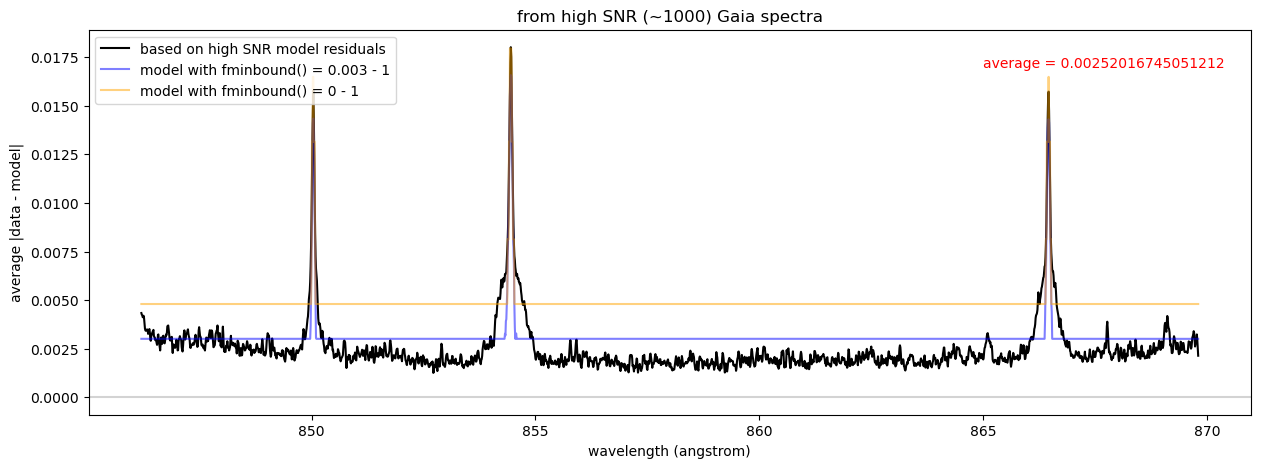

In [44]:
%pylab inline
figure(figsize=(15,5))
single_fit_arr = np.array(single_fit).T
plot(gaia_spectrum.custom_model.w, np.mean(single_fit_arr, axis=1), 'k-', 
     label='based on high SNR model residuals')
xlabel('wavelength (angstrom)');ylabel('average |data - model|')
title('from high SNR (~1000) Gaia spectra')
text(865, 0.017, 'average = {}'.format(np.mean(single_fit_arr)), color='r')

import thecannon as tc
model_fminbound = tc.CannonModel.read('./data/cannon_models/gaia_rvs_model_cleaned.model')
plot(gaia_spectrum.custom_model.w, model_fminbound.s2**(1/2), 'b-',
    label='model with fminbound() = 0.003 - 1', alpha=0.5)

model_fminbound2 = tc.CannonModel.read('./data/cannon_models/test_model.model')
plot(gaia_spectrum.custom_model.w, model_fminbound2.s2**(1/2), 
    label='model with fminbound() = 0 - 1', alpha=0.5, color='orange')
legend(loc='upper left')
axhline(0,color='lightgrey')

In [47]:
# let me write this to a file very temporarily
from astropy.io import fits
hdu = fits.PrimaryHDU(np.mean(single_fit_arr, axis=1)**2)
fits.HDUList([hdu]).writeto('empirical_model_s2.fits')

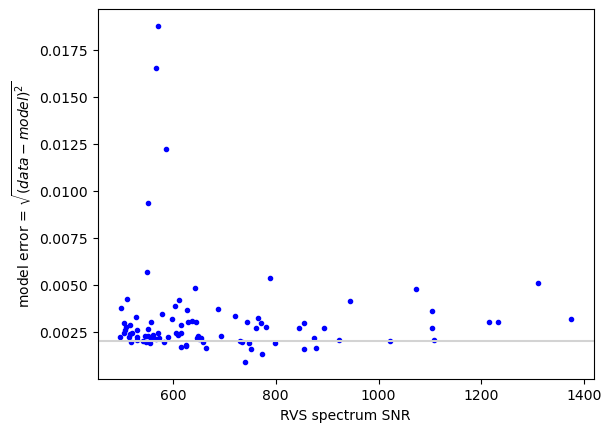

In [10]:
plot(bright_snr, bright_model_sigma, 'b.')
xlabel('RVS spectrum SNR')
ylabel(r'model error = $\sqrt{(data - model)^2}$')
axhline(0.002, color='lightgrey')
#yscale('log')

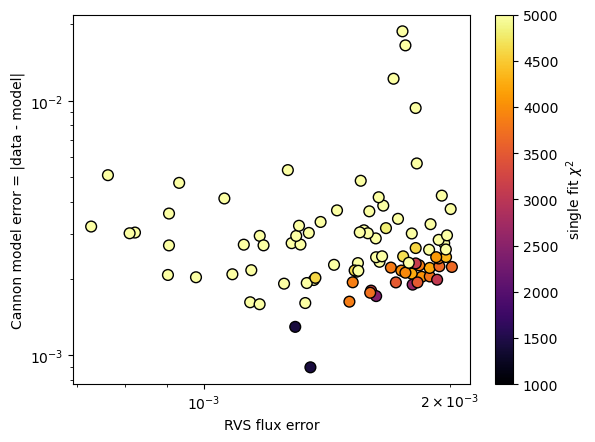

In [11]:
bright_signal_sigma = [1/i for i in bright_snr]
scatter(bright_signal_sigma, bright_model_sigma, c=bright_single_fit_chisq, cmap='inferno',
        edgecolor='k', vmin=1000,vmax=5000, s=60)
xlabel('RVS flux error')
ylabel(r'Cannon model error = |data - model|')
#plot([0,0.021],[0,0.021], 'k-', lw=0.4)
#fill_between([0,0.04],[0,0.04], y2=0.1, alpha=0.4, color='lightgrey')
#xscale('log');yscale('log');title('SPOCS sample')
yscale('log');xscale('log')
colorbar(label=r'single fit $\chi^2$')
#text(4e-3, 1e-3,'photon noise limited', color='dimgrey')
#text(1e-3,4e-2,'model uncertainty limited', color='dimgrey')
#xlim(5e-4,0.1);ylim(5e-4,0.1)
#axvline(1/150, color='dimgrey') # training set uncertainty

In [12]:
print(np.mean(bright_model_sigma))
# so this would have an error of 0.0003
# I think I should use this.
# but do I set the minimum to 0.0001 and hope it finds 0.0003?
# let me see if that works...

0.003189396680339411


Text(0.0034, 15, 'mean=0.003189396680339411')

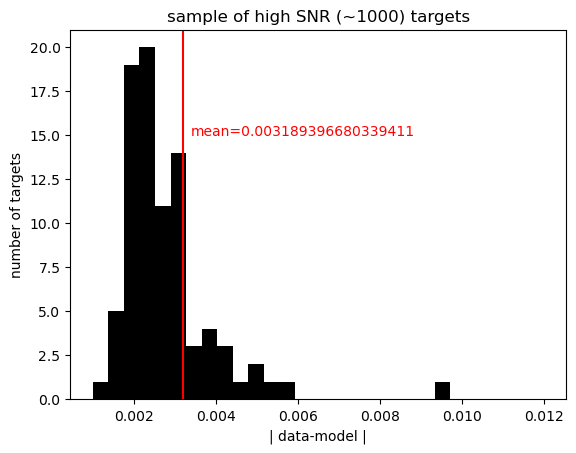

In [18]:
hist(bright_model_sigma, bins=np.linspace(0.001,0.012,30), color='k')
xlabel('| data-model |');ylabel('number of targets')
title('sample of high SNR (~1000) targets')
axvline(np.mean(bright_model_sigma), color='r')
text(0.0034, 15, 'mean={}'.format(np.mean(bright_model_sigma)), color='r')
# what are the training densities?